In [0]:
import numpy as np
import matplotlib.pyplot as plt

Data = np.genfromtxt('EMGaussian.data' )

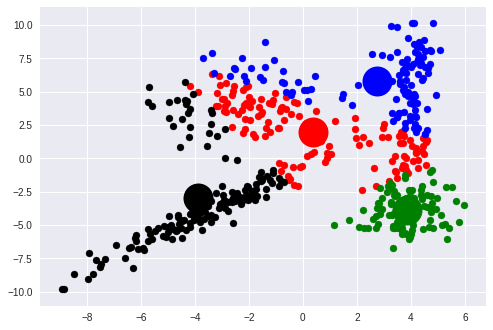

In [0]:
def Kmeans(X,K):
  
  #assign random means
  Bounds = np.array([[np.min(X[:,i]),np.max(X[:,i])] for i in range(X.shape[1])])
  Means = np.array([[np.random.uniform(Bounds[i,0],Bounds[i,1]) for i in range(X.shape[1])] for j in range(K)])
  Cluster = {} #dictionnary that keeps track of which points belong in each cluster
  update = np.inf; New_Means = Means #stopping criteria is ||New_Means - Means||
  
  #iterate
  while update > 0:
    #compute the closest mean for each point of X
    Dist = np.array([np.argmin([np.linalg.norm(X[i,:]-mean,2) for mean in Means]) for i in range(X.shape[0]) ])
    for k in range(K):
      #update dictionnary
      Cluster[k] = np.where(Dist==k)
      #update each mean
      New_Means[k,:] = np.mean(X[Cluster[k],0]),np.mean(X[Cluster[k],1])
    #compute the difference
    update = np.linalg.norm(New_Means - Means)
    Means = New_Means
    
  return Means,Cluster
  
means,Cluster = Kmeans(Data,4)
X0 = Data[Cluster[0],:].reshape(-1,2)
X1 = Data[Cluster[1],:].reshape(-1,2)
X2 = Data[Cluster[2],:].reshape(-1,2)
X3 = Data[Cluster[3],:].reshape(-1,2)

plt.scatter(X0[:,0],X0[:,1],c='r')
plt.plot(means[0][0],means[0][1],'ro',markersize=30)
plt.scatter(X1[:,0],X1[:,1],c='g')
plt.plot(means[1][0],means[1][1],'go',markersize=30)
plt.scatter(X2[:,0],X2[:,1],c='b')
plt.plot(means[2][0],means[2][1],'bo',markersize=30)
plt.scatter(X3[:,0],X3[:,1],c='k')
plt.plot(means[3][0],means[3][1],'ko',markersize=30)

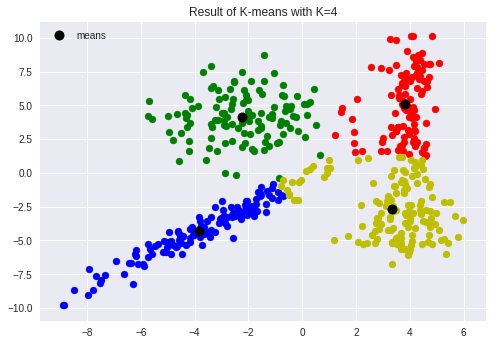

In [0]:
def Kmeans(X,K,num_max):
  
  #assign random means
  Bounds = np.array([[np.min(X[:,i]),np.max(X[:,i])] for i in range(X.shape[1])])
  Means = np.array([[np.random.uniform(Bounds[i,0],Bounds[i,1]) for i in range(X.shape[1])] for j in range(K)])
  Cluster = {} #dictionnary that keeps track of which points belong in each cluster
  
  #iterate
  for iter in range(num_max):
    #compute the closest mean for each point of X
    Dist = np.array([np.argmin([np.linalg.norm(X[i,:]-mean,2) for mean in Means]) for i in range(X.shape[0]) ])
    for k in range(K):
      #update dictionnary
      Cluster[k] = np.where(Dist==k)
      #update each mean
      Means[k,:] = np.mean(X[Cluster[k],0]),np.mean(X[Cluster[k],1])
    
  return Means,Cluster
  
means,Cluster = Kmeans(Data,4,100)
X0 = Data[Cluster[0],:].reshape(-1,2)
X1 = Data[Cluster[1],:].reshape(-1,2)
X2 = Data[Cluster[2],:].reshape(-1,2)
X3 = Data[Cluster[3],:].reshape(-1,2)

plt.scatter(X0[:,0],X0[:,1],c='r')
plt.plot(means[0][0],means[0][1],'ko',markersize=10)
plt.scatter(X1[:,0],X1[:,1],c='g')
plt.plot(means[1][0],means[1][1],'ko',markersize=10)
plt.scatter(X2[:,0],X2[:,1],c='b')
plt.plot(means[2][0],means[2][1],'ko',markersize=10)
plt.scatter(X3[:,0],X3[:,1],c='y')
plt.plot(means[3][0],means[3][1],'ko',markersize=10, label = 'means')
plt.title('Result of K-means with K=4')
plt.legend()

Text(0.5,1,'Means found by K-means for different random initialisations')

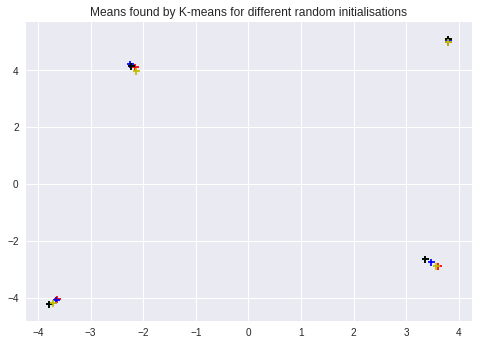

In [0]:
#Compare the results:
Means = {}; Clusters = {}; colour = ['r','g','b','k','y']
for i in range(5):
  means,Cluster = Kmeans(Data,4,200)
  Means[i] = means
  plt.scatter(means[:,0],means[:,1],c=colour[i],marker = '+')
plt.title('Means found by K-means for different random initialisations')
  
#IDEA: Perform K-means on the different K-means found !

In [6]:
import numpy as np
print(np.ones(5)*2)
x = np.array([0.2,0.8])
print(np.dot(x,x))
print(np.dot(x,np.matmul(np.eye(2),x)))
print(np.linalg.det(np.eye(5)*2))

[2. 2. 2. 2. 2.]
0.6800000000000002
0.6800000000000002
32.0


In [0]:
def N(x,mu,Sigma):
  d = len(mu)
  return np.exp(-0.5*np.dot(x-mu,np.dot(np.linalg.inv(Sigma),(x-mu))))/np.sqrt(((2*np.pi)**d)*np.linalg.det(Sigma))

def EM(X,K):
  d,n = X.shape
  Q = np.zeros((d,K))
  #assign random means
  Bounds = np.array([[np.min(X[:,i]),np.max(X[:,i])] for i in range(X.shape[1])])
  mu = np.array([[np.random.uniform(Bounds[i,0],Bounds[i,1]) for i in range(X.shape[1])] for j in range(K)])
  sigma = np.random.uniform(size = K)
  pi = np.random.uniform(size = K)
  pi = pi/sum(pi)
  #print(pi)
  Cluster = {} #dictionnary that keeps track of which points belong in each cluster
  
  for iter in range(50):
    #expectation step
    for i in range(d):
      Sum = sum([pi[j]*N(X[i,:],mu[j,:],sigma[j]*np.eye(n)) for j in range(K)])
      for k in range(K):
        #print(pi[k]*N(X[i,:],mu[k,:],sigma[k]*np.eye(n))/Sum)
        Q[i,k] = pi[k]*N(X[i,:],mu[k,:],sigma[k]*np.eye(n))/Sum
    #maximization step
    for k in range(K):
      Sum_Q = [sum([Q[i,k] for i in range(d)]) for i in range(d)]
      mu[k,:] = sum([X[i,:]*Q[i,k] for i in range(d)])/Sum_Q[k]
      sigma[k] = sum([Q[i,k]*np.dot(X[i,:] - mu[k,:],X[i,:] - mu[k,:]) for i in range(d)])/(d*Sum_Q[k])
      pi[k] = Sum_Q[k]/(sum(Sum_Q)-Sum_Q[k])
      
def EM(X,K,mu,sigma,pi):
  d,n = X.shape
  Q = np.zeros((d,K))
  
  for iter in range(20):
    
    #expectation step
    for i in range(d):
      
      Sum = sum([pi[j]*N(X[i,:],mu[j,:],sigma[j]*np.eye(n)) for j in range(K)]) #sum over k for each i
      for k in range(K):
        
        Q[i,k] = pi[k]*N(X[i,:],mu[k,:],sigma[k]*np.eye(n))/Sum
        
    #maximization step
    Sum_Q = [sum([Q[i,k] for i in range(d)]) for k in range(K)] #sum over i for each k
    for k in range(K):
       
      mu[k,:] = sum([X[i,:]*Q[i,k] for i in range(d)])/Sum_Q[k]
      sigma[k] = sum([Q[i,k]*np.dot(X[i,:] - mu[k,:],X[i,:] - mu[k,:]) for i in range(d)])/Sum_Q[k]
      pi[k] = Sum_Q[k]/(sum(Sum_Q))
      
  return(mu,sigma,pi)

#assign random means
X = Data; d,n = X.shape
K = 4
Bounds = np.array([[np.min(X[:,i]),np.max(X[:,i])] for i in range(X.shape[1])])
mu = np.array([[np.random.uniform(Bounds[i,0],Bounds[i,1]) for i in range(X.shape[1])] for j in range(K)])
sigma = np.array([1 for s in range(K)])
pi = np.random.uniform(size = K)
pi = pi/sum(pi)  
  
mu,sigma,pi = EM(Data,4,mu,sigma,pi)
Sigma = {}
for k in range(K):
  Sigma[k] = np.eye(n)*sigma[k]

In [0]:
def EM(X,K,mu,Sigma,pi):
  d,n = X.shape
  Q = np.zeros((d,K))
  
  for iter in range(20):
    
    #expectation step
    for i in range(d):
      
      Sum = sum([pi[j]*N(X[i,:],mu[j,:],Sigma[j]) for j in range(K)]) #sum over k for each i
      for k in range(K):
        
        Q[i,k] = pi[k]*N(X[i,:],mu[k,:],Sigma[k])/Sum
        
    #maximization step
    Sum_Q = [sum([Q[i,k] for i in range(d)]) for k in range(K)] #sum over i for each k
    for k in range(K):
       
      mu[k,:] = sum([X[i,:]*Q[i,k] for i in range(d)])/Sum_Q[k]
      Sigma[k] = sum([Q[i,k]*np.outer(X[i,:] - mu[k,:],X[i,:] - mu[k,:]) for i in range(d)])/Sum_Q[k]
      pi[k] = Sum_Q[k]/(sum(Sum_Q))
    #print(iter)
    #print('Q = ',Q)
    #print('mu = ',mu)
    #print('Sigma = ',Sigma)
    #print('Pi = ',pi)
      
  return(mu,Sigma,pi)
  

#assign random means
X = Data; d,n = X.shape
K = 4
Bounds = np.array([[np.min(X[:,i]),np.max(X[:,i])] for i in range(X.shape[1])])
mu = np.array([[np.random.uniform(Bounds[i,0],Bounds[i,1]) for i in range(X.shape[1])] for j in range(K)])
Sigma = {}
for k in range(K):
  Sigma[k] = np.eye(n)
pi = np.random.uniform(size = K)
pi = pi/sum(pi)  
mu,Sigma,pi = EM(Data,4,mu,Sigma,pi)

In [0]:
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, c, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 2):
        nsig = 0.9
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, fill=False, color = c, **kwargs))
        
    ax.set_xlim([-10,10])
    ax.set_ylim([-10,10])

[[ 0.50320356  0.61213914]
 [ 0.49422547  0.5861716 ]
 [-1.10526824 -1.95248397]
 [ 0.49992446  0.60282514]] {0: array([[33.,  0.],
       [ 0., 33.]]), 1: array([[33.,  0.],
       [ 0., 33.]]), 2: array([[32.,  0.],
       [ 0., 32.]]), 3: array([[33.,  0.],
       [ 0., 33.]])}


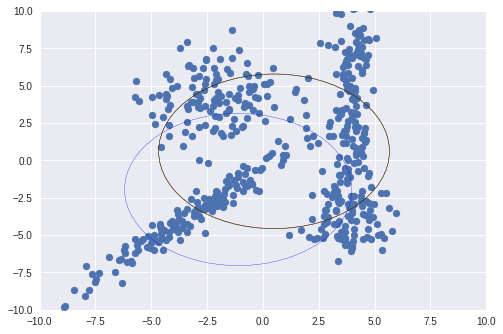

In [0]:
for k in range(K):
  draw_ellipse(mu[k],Sigma[k],colour[k])
plt.scatter(Data[:,0],Data[:,1])
  
  
print(mu,Sigma)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multiv

[[0.002 0.001 0.997 0.   ]
 [0.    0.    1.    0.   ]
 [0.    0.    0.001 0.999]
 [0.    0.008 0.992 0.   ]
 [0.    0.998 0.002 0.   ]]


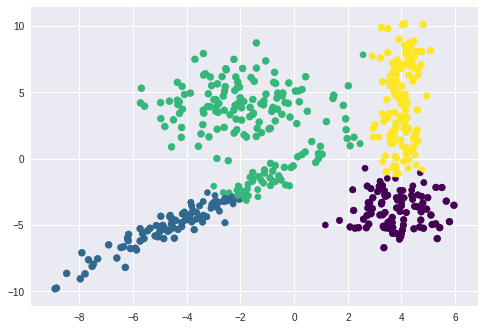

In [0]:
from sklearn.mixture import GMM
gmm = GMM(n_components=4).fit(X)
labels = gmm.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');

probs = gmm.predict_proba(X)
print(probs[:5].round(3))

size = 50 * probs.max(1) ** 2  # square emphasizes differences
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=size);

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multiv

[[-4.46434907 -4.94103647]
 [ 3.9929515   4.00638464]
 [ 3.80412856 -3.70925123]
 [-1.63761316  2.43713133]]


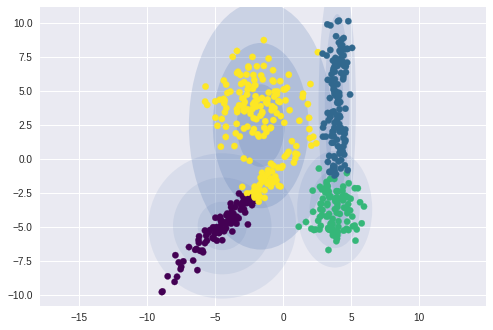

In [0]:
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covars_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)
        
    print(gmm.means_)
        
gmm = GMM(n_components=4, random_state=42)
plot_gmm(gmm, X)